# LAB -- Chaos

**Please write your name in this box**

*We encourage you to work together, and seek whatever help you need in completing this lab.  Please list all people who you worked with or received help from*

*We encourage you to use any online resources that you find useful. Please list any URL's that you consulted*

*We encourage you to use AI resources if you find them useful.  If you made use of AI, please list the platform and the prompts which you made use of*

## Background

There are some areas of physics which are simply impossible to study without computers.  One of these is **chaos** a phenomenon which was first observed in numerical experiments.

A chaotic system is characterized by *sensitive dependence to initial conditions*.  This means that making a small change to your initial conditions leads to a large change in the trajectory at long times.  One quantifies this property by looking at how the difference $\delta r$ between two trajectories grows with time.  In a chaotic system $\delta r\sim e^{\lambda t}$ where $\lambda>0$ is the Lyapunov exponent.

There are a number of cannonical examples of chaotic systems.  Some of these are described by differential equations, such as:
* Double Pendulum
* Driven nonlinear oscillator (Duffing Oscillator)
* Harmonic oscillator with non-linear damping (Van der Pol oscillator)
* Lorenz equations (simple climate model)

One generically expects that any sufficiently nonlinear set of differential equations with enough degrees of freedom will display chaos.

There are also discrete maps that display chaos.

This will be a short lab where you investigate a chaotic system.  To get chaos you need at least 3 degrees of freedom for an autonomous system, or 2 degrees of freedom for a driven system. We will use the example of the Duffing oscillator, a nonlinear oscillator with periodic driving.  It is a nice example because it has parameters which let you tune from regular to chaotic behavior.

## Workflow

Feel free to use whatever workflow you find helpful.  Do everything in one notebook, or use a file that you import with `include`.  As a reminder you can use `@debug` statements, and turn on/off the output of those with 

In [1]:
using Logging
default_logger=global_logger()
debug_logger=ConsoleLogger(stderr, Logging.Debug); # set up logger

# global_logger(debug_logger) # turns on printing of @debug statements
# global_logger(default_logger) # turns off printing of @debug statements
#
# or wrap code in
# with_logger(debug_logger) do 
#    ...
# end

I am going to recommend that you use `DifferentialEquations.jl` for solving our equations.  Here is a quick reminder of the syntax.

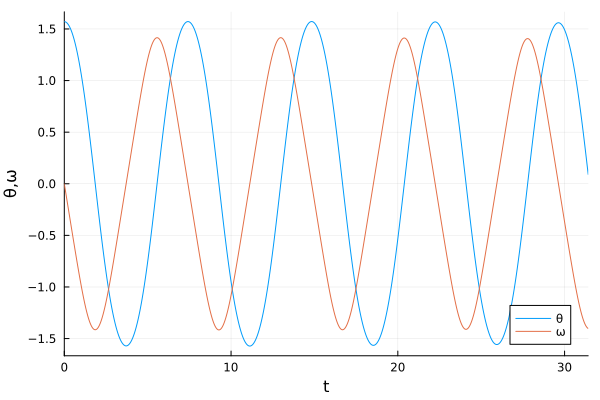

In [2]:
using DifferentialEquations,Plots

function pendulum_dxdt(x,p,t)
    (theta,v)=x
    return [v, -sin(theta)]
end
xp0=[pi/2, 0.]
tspan=[0., pi*10]
args1=ODEProblem(pendulum_dxdt,xp0,tspan)
ptraj1=solve(args1)
plot(ptraj1,label=["θ" "ω"],xlabel="t",ylabel="θ,ω")

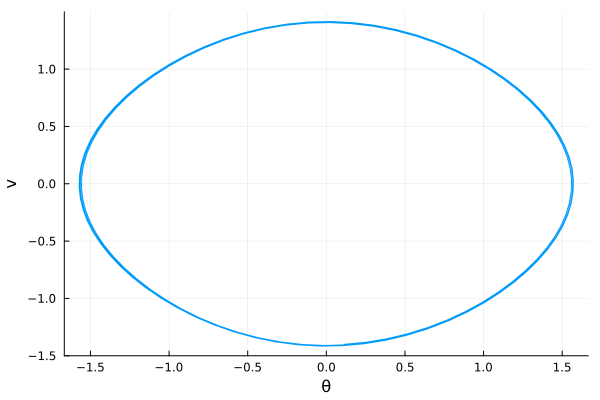

In [3]:
twpoints=[Tuple(ptraj1(t)) for t in 0:0.1:10*pi]
plot(twpoints,xlabel="θ",ylabel="v",label="")

We are going to make a lot of plots like that, so it is useful to make some visualization functions

In [4]:
function plot_xt(trajectory,initialT,finalT,dT;opts...)
    xt=[(t,trajectory(t)[1]) for t in initialT:dT:finalT]
    plot(xt;opts...)
end

function plot_xt!(trajectory,initialT,finalT,dT;opts...)
    xt=[(t,trajectory(t)[1]) for t in initialT:dT:finalT]
    plot!(xt;opts...)
end

function plot_xv(trajectory,initialT,finalT,dT;opts...)
    xv=[Tuple(trajectory(t)) for t in initialT:dT:finalT]
    plot(xv;opts...)
end

function plot_xv!(trajectory,initialT,finalT,dT;opts...)
    xv=[Tuple(trajectory(t)) for t in initialT:dT:finalT]
    plot!(xv;opts...)
end

plot_xv! (generic function with 1 method)

Here are some sample uses

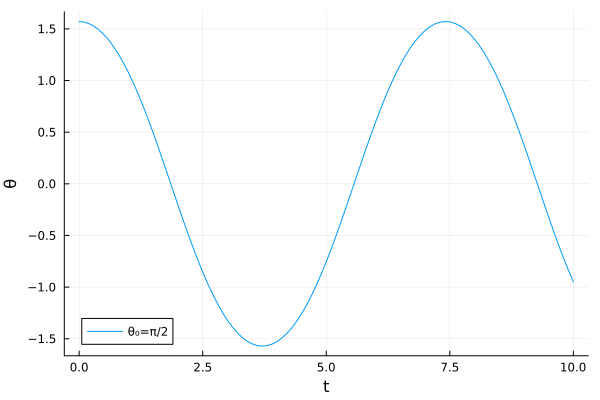

In [5]:
plot_xt(ptraj1,0,10,0.1;xlabel="t",ylabel="θ",label="θ₀=π/2")

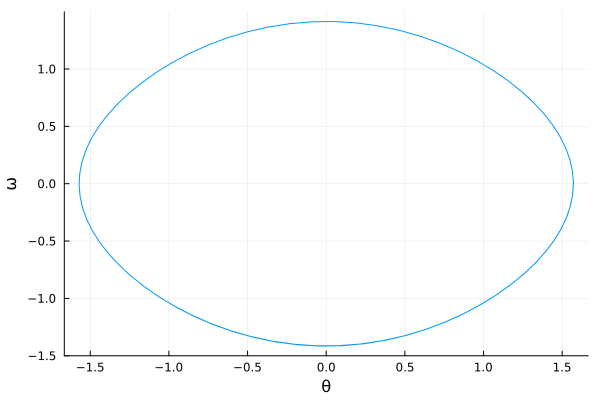

In [6]:
plot_xv(ptraj1,0,10,0.1;xlabel="θ",ylabel="ω",label="")

It is a good strategy to make short scripts like these to make your future code easier to write.  Whenever you find yourself doing a lot of copy and paste, it is probably time to encapsulate it.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 1
</h2>

We will consider a non-linear oscillator described by the equations
\begin{align}
\frac{dx}{dt}&=v\\
\frac{dv}{dt}&=-2\gamma v-\alpha x-\beta x^3 +F \cos(\omega t).
\end{align}
Here $\gamma$ is the damping rate, $F$ is the strength of a periodic drive, with frequency $\omega$, and $\alpha,\beta$ describe the potential.  For $\beta=0$ we have a harmonic potential, resulting in a driven simple Harmonic Oscillator.

An interesting case is when $\alpha<0$ and $\beta>0$.  In that case the potential is a double well
\begin{equation}
V(x)=\frac{\alpha}{2} x^2+\frac{\beta}{4} x^4.
\end{equation}

**Write a function that takes the parameters $\alpha,\beta,\gamma,F,\omega$ the initial conditions $x_0,v_0$, and the evolution time $T$.  It will return the solution to the differential equation, as found from `DifferentialEquations.jl`.**

There are various ways of organizing the input.  Personally I like this sort of signature:

    function duffing(initialxv,T,α,β,γ,F,ω)
        ...
    end

and then the following two extra signatures

    duffing(initialxv,T;α,β,γ,F,ω)=duffing(initialxv,T,α,β,γ,F,ω)
    duffing(;initialxv,T,α,β,γ,F,ω)=duffing(initialxv,T,α,β,γ,F,ω)

I would then call it with

    params=(α=-1,β=1,γ=0,F=0,ω=1)
    duffing([1.5,0],10;params...)

Test by setting $\alpha=-1,\beta=1,\gamma=0$ and $F=0$.  This is an undamped double-well potential.  Integrate the equations of motion for $v_0=0$ and for four different starting positions $x_0=-1.5,-1.-0.5,0.0.5,1.1.5$.  Take a reasonably large $T$ -- say $100$.  Plot $x$ vs $t$ for each of these cases (all on the same graph).  For clarity, do not include $v$ on that graph.  Also make plots of $v$ vs $x$ -- again all on the same graph.  Comment on what is happening for each trajectory.

See if you can do a more finely spaced set of initial values -- say $x_0=-1.6,-1.5,-1.4,-1.3,...1.4,1.5,1.6$.  The $x(t)$ plot will be too busy, but the phase plane plots will look pretty nice.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 2
</h2>

We will now add driving and damping.  From your experience with damped Harmonic oscillators, you expect to have some transients, before the system settles into periodic motion at the drive frequency.

Take $\gamma=0.1$ and $x_0=0.1$.  Drive with $F=0.1$ at a frequency of $\omega=1$, up to time $T=200$.  Make a plot of $x(t)$.  You should see that the transients die out on a timescale of $1/\gamma$.  Plot the phase-space trajectory from `initialT=150` to `finalT=200`.  It should look like a nice periodic orbit.  (It is also fun to look at the transient behavior, but it is a bit complicated looking)

Compare with the case where $x_0=0.15$.  You should see that the two trajectories remain close together for all time.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 3
</h2>

Increase $F$ to 0.35.  Make a plot of $x(t)$.  Does it settle into a periodic orbit?

Compare the case of $x_0=0.1$ and $x_0=0.11$.  Do they stay close together?

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 4
</h2>

One challenge with these chaotic systems is that the trajectories are kind of complicated.  One approach to taming this complexity is to view the system stroboscopically.  If we plot $(x,v)$ for times $t=0,2\pi/\omega,4\pi/\omega,\cdots$ we see where the oscillator is at the same point in the forcing cycle.  This is refered to as a *Poincaré Section*.  

We can create a Poincare Section by creating a command `scatter_xv`, which is the same as `plot_xv`, but uses the `scatter` command instead of `plot`.  we then  evaluate  `scatter_xv`  with a timestep of `2\pi/\omega`.  (Note the integrator does not use this time-step, it just reflects when we plot the data.)

Create Poincare Sections for the two trajectories you calculated in the last activity.  You will want to go to longer times -- say $T=10,000$.

You should see that the points will trace out some curve in phase space -- referred to as a "strange attractor."  It turns out that this object is a fractal.